In [70]:
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import tree
import pandas as pd
import numpy as np
jazz = nx.read_gml( 'jazz.gml', label = None)
karate = nx.read_gml('karate.gml', label = None)
edge_df = nx.to_pandas_edgelist(jazz)
edge_df

,source,target,id,value
0,1,8,0,2.0
1,1,24,1,2.0
2,1,35,2,2.0
3,1,42,3,2.0
4,1,46,4,2.0
...,...,...,...,...
2737,194,196,5341,2.0
2738,194,197,5342,2.0
2739,195,196,5387,2.0
2740,195,197,5388,2.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


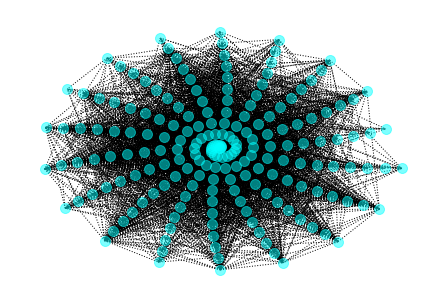

In [71]:
F = nx.from_pandas_edgelist(edge_df)
nx.draw(F, with_labels = False,
                node_size = 100,
                node_color= [0,1,1,0.5],
                style = 'dotted',
                 font_color = '32',
                 pos=nx.spiral_layout(jazz))
plt.show()

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('C', '1'), ('C', '2')]


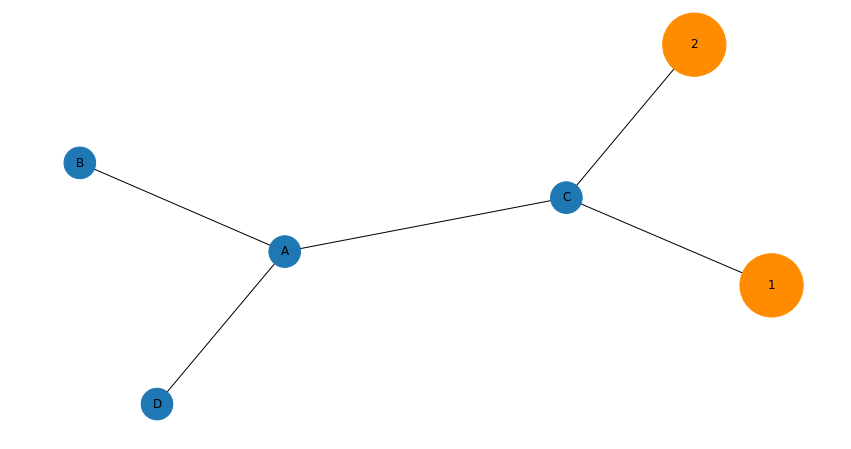

In [72]:


fig, ax = plt.subplots(figsize=(15, 8))

relationships = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2'], 
                              'to':   ['B', 'C', 'D', 'C', 'C']})

# Create DF for node characteristics
carac = pd.DataFrame({'ID':['A', 'B', 'C', 'D', '1', '2'], 
 'type':['Letter','Letter', 'Letter', 'Letter', 'Number', 'Number']})

# Create graph object
G = nx.from_pandas_edgelist(relationships, 'from', 'to', create_using=nx.Graph())
print(G.edges())
# Make types into categories
carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())

carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes

# Specify colors
cmap = matplotlib.colors.ListedColormap(['C0', 'darkorange'])

# Set node sizes
node_sizes = [4000 if entry != 'Letter' else 1000 for entry in carac.type]

# Draw graph
nx.draw(G, with_labels=True, node_color=carac['type'].cat.codes, cmap=cmap, 
        node_size=node_sizes)

In [ ]:
edge_index_id = edge_df.set_index('id')
T = nx.from_pandas_edgelist(edge_index_id, 'source', 'target', create_using=nx.Graph())


In [152]:
a = [x for x in T.degree()]
b = [x[1] for x in a]
c = [x for x in b]
c

[23,
 21,
 29,
 43,
 12,
 23,
 96,
 20,
 26,
 42,
 40,
 46,
 60,
 49,
 49,
 23,
 20,
 60,
 56,
 75,
 43,
 10,
 74,
 45,
 3,
 25,
 46,
 39,
 4,
 7,
 41,
 45,
 40,
 16,
 46,
 25,
 31,
 29,
 19,
 19,
 23,
 39,
 22,
 23,
 24,
 24,
 31,
 24,
 1,
 13,
 28,
 31,
 19,
 42,
 37,
 31,
 17,
 16,
 20,
 40,
 33,
 52,
 18,
 16,
 17,
 40,
 100,
 31,
 17,
 54,
 20,
 12,
 25,
 56,
 45,
 36,
 2,
 3,
 4,
 57,
 27,
 23,
 26,
 42,
 25,
 32,
 33,
 29,
 53,
 62,
 30,
 9,
 59,
 24,
 27,
 26,
 41,
 28,
 13,
 44,
 55,
 31,
 29,
 23,
 35,
 23,
 27,
 23,
 59,
 31,
 53,
 48,
 20,
 39,
 15,
 27,
 55,
 28,
 46,
 17,
 43,
 41,
 39,
 31,
 52,
 20,
 13,
 41,
 19,
 19,
 20,
 13,
 51,
 16,
 18,
 19,
 46,
 21,
 37,
 20,
 6,
 5,
 5,
 13,
 8,
 9,
 8,
 24,
 48,
 38,
 2,
 30,
 27,
 36,
 39,
 22,
 11,
 19,
 29,
 25,
 14,
 1,
 4,
 39,
 40,
 34,
 34,
 37,
 32,
 31,
 32,
 33,
 34,
 33,
 9,
 13,
 14,
 14,
 18,
 5,
 6,
 5,
 6,
 6,
 7,
 7,
 12,
 8,
 17,
 3,
 6,
 10,
 14,
 18,
 1,
 2,
 1,
 1]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


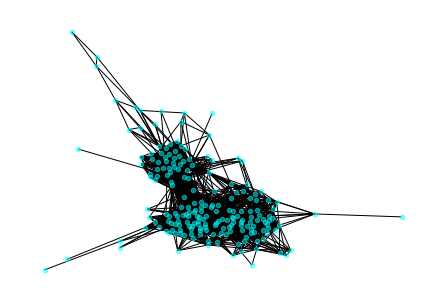

In [108]:
nx.draw(T,
pos=nx.spring_layout(T, iterations=150),
node_color = [0,1,1,0.5],
node_size =20 )